<a href="https://colab.research.google.com/github/snsn3/genAI_regional_study/blob/main/EN_topic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic model for English responses - see notes: we model topics separately for each language as noted in the paper. This is for clarity

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Helper function: Display topics after model fit
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append(topic_keywords)
    return topics

# Load the GML_Lab dataset - see dataset in this repo - this is the English responses file
file_path = 'GML_Lab_EN.csv'
data = pd.read_csv(file_path)
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union({'public', 'yes','including','ensure'}))

# Initialize a dictionary to store topics for each region
region_topics = []

# Iterate through each region
for region, group in data.groupby('name_fr'):
    # Configure the vectorizer to capture n-grams (phrases)
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, max_features=1000, stop_words=custom_stopwords, ngram_range=(1, 3))
    dtm = vectorizer.fit_transform(group['reponse'])

    """ Note:
    contrary to French where we built a custom disctionary (manually), here for English responses, we use a default stopwords list from sklearn.

    """

    # Build LDA model - just like we did for French (see separate code)
    lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=42)
    lda.fit(dtm)

    """
    Online variational Bayes- faster training
    random state: to ensure reproducibility
    max number of iterations: 5
    max num of topics: 3

    """

    # Get the topics found by the LDA model
    tf_feature_names = vectorizer.get_feature_names_out()
    topics = display_topics(lda, tf_feature_names, 2)

    # Append the region and topics to the list
    for topic in topics:
        region_topics.append({'region': region, 'topics': topic})

# Convert the list to a DataFrame
region_topics_df = pd.DataFrame(region_topics)

# Display the table
print(region_topics_df)

# Save the table to a CSV file
region_topics_df.to_csv('EN_tabled_region_topics.csv', index=False)

             region                         topics
0           Afrique         government communities
1           Afrique         individuals government
2           Afrique               legal government
3  Amérique du Nord              laws transparency
4  Amérique du Nord  indigenous indigenous peoples
5  Amérique du Nord         government individuals


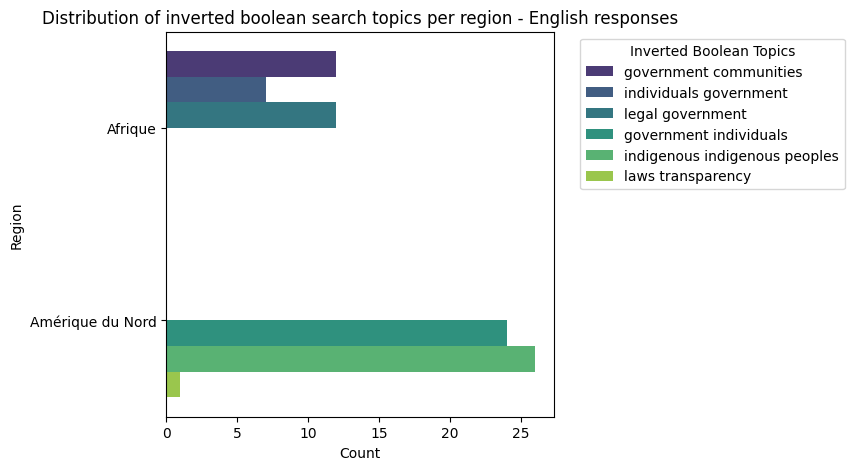

'for region, topics in region_topics.items():\n    print(f"Region: {region}")\n    for i, topic in enumerate(topics):\n        wordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate(topic)\n        plt.figure(figsize=(10, 5))\n        plt.imshow(wordcloud, interpolation=\'bilinear\')\n        plt.axis(\'off\')\n        plt.title(f"Topic {i+1} in {region}")\n        plt.show()'

In [ ]:
# Load the GML_Lab dataset
file_path = 'GML_Lab_EN.csv'
data = pd.read_csv(file_path)
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union({'public', 'yes','including','ensure'}))

# Initialize a dictionary to store topics for each region
region_topics = {}

# Helper function: Display topics after model fit
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append(topic_keywords)
    return topics

# Iterate through each region
for region, group in data.groupby('name_fr'):
    # Configure the vectorizer to capture n-grams (phrases)
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, max_features=1000, stop_words=custom_stopwords, ngram_range=(1, 3))
    dtm = vectorizer.fit_transform(group['reponse'])

    # Build LDA model
    lda = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=42)
    lda.fit(dtm)

    # Get the topics found by the LDA model
    tf_feature_names = vectorizer.get_feature_names_out()
    topics = display_topics(lda, tf_feature_names, 2)
    region_topics[region] = topics

    # Get topics for each document
    document_topics = lda.transform(dtm)
    dominant_topics = np.argmax(document_topics, axis=1)
    document_topics_labels = [topics[i] for i in dominant_topics]

    # Update the dataframe with the new topics column for this region
    data.loc[group.index, 'topics'] = document_topics_labels

# Bar Plot for Topic Distribution by Region
topic_counts = data.groupby(['name_fr', 'topics']).size().reset_index(name='counts')
plt.figure(figsize=(5, 5))
sns.barplot(x='counts', y='name_fr', hue='topics', data=topic_counts, palette='viridis')
plt.title('Distribution of inverted boolean search topics per region - English responses')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='Inverted Boolean Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Word Cloud for each topic in each region
"""for region, topics in region_topics.items():
    print(f"Region: {region}")
    for i, topic in enumerate(topics):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {i+1} in {region}")
        plt.show()"""